In [9]:
# Import the required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# Load the earthquake data
data = pd.read_csv('earthquake_dataset.csv')

In [11]:
data.head()

,latitude,longitude,depth,mag,id,hour,date
0,34.189835,-117.58800,6.000,1.70,ci12317071,0,01-01-1973
1,-9.214000,150.63400,41.000,5.30,usp0000001,3,01-01-1973
2,48.308666,-122.11733,13.680,2.20,uw10840118,4,01-01-1973
3,-15.012000,-173.95800,33.000,5.00,usp0000002,5,01-01-1973
4,19.443666,-155.36084,7.302,1.85,hv19723167,7,01-01-1973


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   latitude   1048575 non-null  float64
 1   longitude  1048575 non-null  float64
 2   depth      1048575 non-null  float64
 3   mag        1048575 non-null  float64
 4   id         1048575 non-null  object 
 5   hour       1048575 non-null  int64  
 6   date       1048575 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 56.0+ MB


In [13]:
# Drop any rows with missing values (NaN)
data = data.dropna()

In [14]:
# Split the data into features (X) and labels (y)
X = data[['latitude', 'longitude', 'depth', 'hour']].values
y = data['mag'].values

In [15]:
# Standardize the features using the StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [18]:

# Compile the model with appropriate loss and optimizer functions
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
23593/23593 [==============================] - 87s 3ms/step - loss: 0.4832 - val_loss: 0.4507
Epoch 2/10
23593/23593 [==============================] - 71s 3ms/step - loss: 0.4420 - val_loss: 0.4273
Epoch 3/10
23593/23593 [==============================] - 73s 3ms/step - loss: 0.4312 - val_loss: 0.4215
Epoch 4/10
23593/23593 [==============================] - 73s 3ms/step - loss: 0.4254 - val_loss: 0.4158
Epoch 5/10
23593/23593 [==============================] - 71s 3ms/step - loss: 0.4193 - val_loss: 0.4201
Epoch 6/10
23593/23593 [==============================] - 73s 3ms/step - loss: 0.4141 - val_loss: 0.4200
Epoch 7/10
23593/23593 [==============================] - 80s 3ms/step - loss: 0.4097 - val_loss: 0.3987
Epoch 8/10
23593/23593 [==============================] - 79s 3ms/step - loss: 0.4068 - val_loss: 0.4080
Epoch 9/10
23593/23593 [==============================] - 80s 3ms/step - loss: 0.4048 - val_loss: 0.4024
Epoch 10/10
23593/23593 [==============================

In [20]:
# Evaluate the model on the testing data
test_loss = model.evaluate(X_test, y_test)

6554/6554 [==============================] - 17s 3ms/step - loss: 0.4090


In [21]:
# Make predictions on new data
new_data = np.array([[120.0, -50.0, 20.0, 12]])
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

1/1 [==============================] - 15s 15s/step


In [22]:
print(f"The predicted magnitude of the earthquake is: {prediction}")

The predicted magnitude of the earthquake is: [[6.470176]]


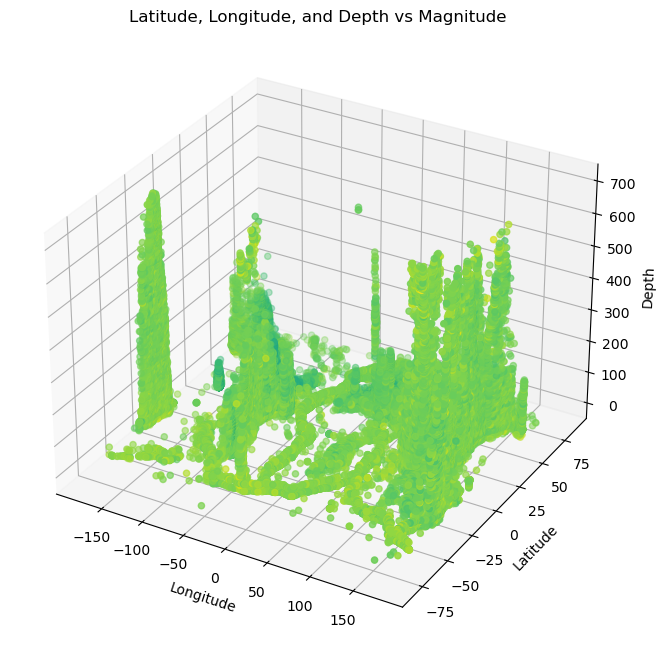

In [23]:
# Visualize the relationship between latitude, longitude, depth, and magnitude
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(data['longitude'], data['latitude'], data['depth'], c=data['mag'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth')
ax.set_title('Latitude, Longitude, and Depth vs Magnitude')
plt.show()

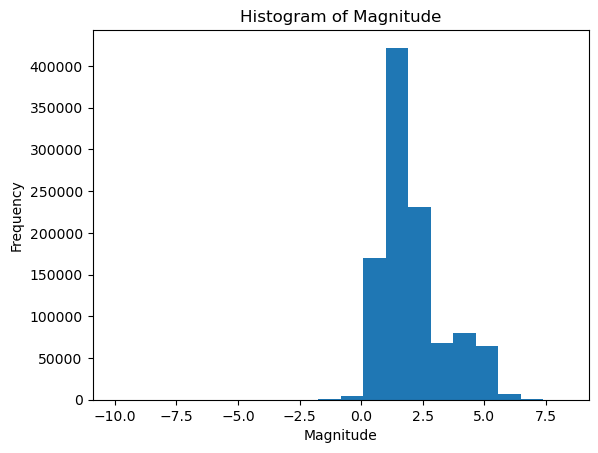

In [24]:
#Histogram of Magnitude
plt.hist(data['mag'], bins=20)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Magnitude')
plt.show()

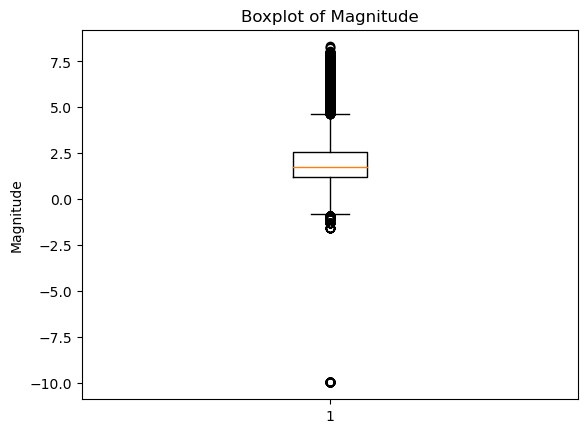

In [25]:
#Box plot of Magnitude
plt.boxplot(data['mag'])
plt.ylabel('Magnitude')
plt.title('Boxplot of Magnitude')
plt.show()


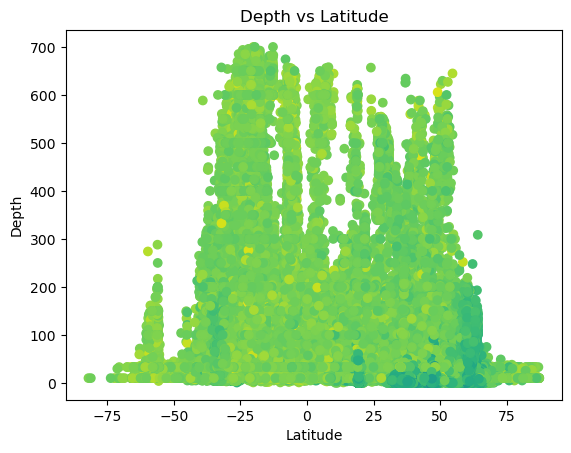

In [26]:
#Scatter plot of Depth vs Latitude
plt.scatter(data['latitude'], data['depth'], c=data['mag'])
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.title('Depth vs Latitude')
plt.show()


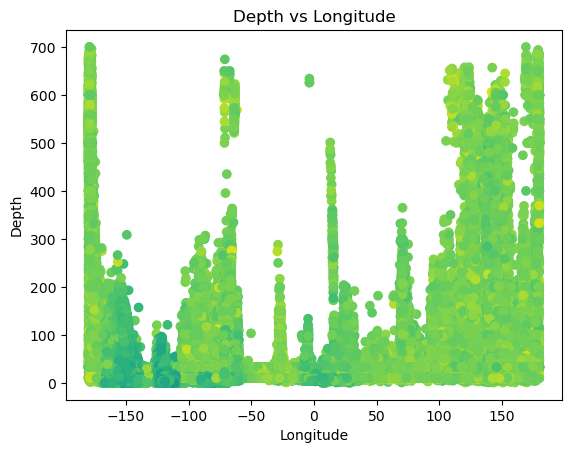

In [27]:
#Scatter plot of Depth vs Longitude
plt.scatter(data['longitude'], data['depth'], c=data['mag'])
plt.xlabel('Longitude')
plt.ylabel('Depth')
plt.title('Depth vs Longitude')
plt.show()


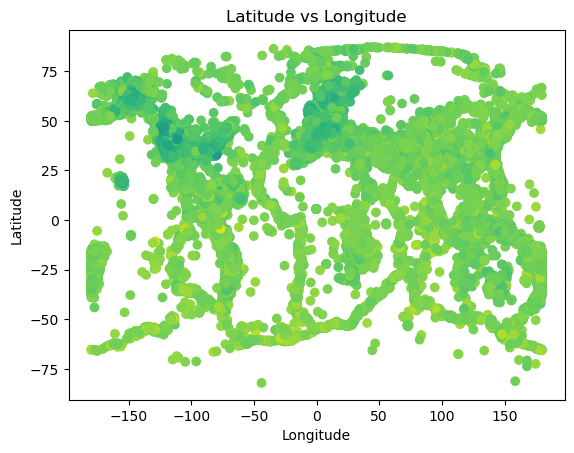

In [28]:
#Scatter plot of latitude and longitude
plt.scatter(data['longitude'], data['latitude'], c=data['mag'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude')
plt.show()

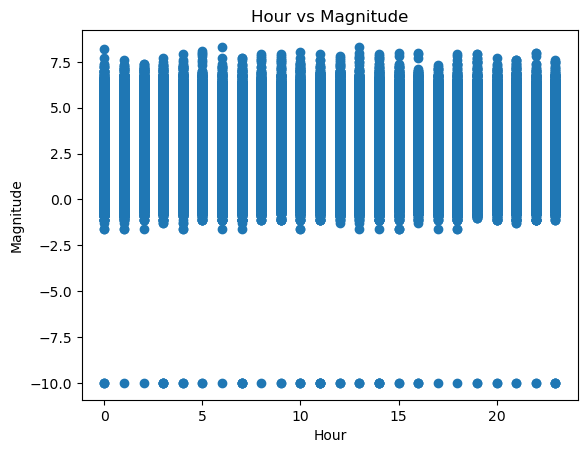

In [29]:
#Scatter plot of Hour vs Magnitude
plt.scatter(data['hour'], data['mag'])
plt.xlabel('Hour')
plt.ylabel('Magnitude')
plt.title('Hour vs Magnitude')
plt.show()
